<a href="https://colab.research.google.com/github/Gayatri4-kesina/ML-Notebook/blob/main/pcawithpipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # StandardScaler for feature scaling
    ('pca', PCA(n_components=2)),        # PCA to reduce to 2 components
    ('classifier', LogisticRegression()) # Logistic Regression Classifier
])

In [ ]:
pipeline.fit(X_train, y_train)

# Step 5: Evaluate the classifier on the test set
classifier_score = pipeline.score(X_test, y_test)
print(f'Classifier Accuracy on Test Set: {classifier_score:.2f}')

# Step 6: Add clustering to the pipeline (using KMeans on PCA-transformed data)
pca_data = pipeline.named_steps['pca'].transform(X)  # Apply PCA transformation to the whole dataset

kmeans = KMeans(n_clusters=3, random_state=42)  # Since Iris has 3 classes
kmeans.fit(pca_data)

# Step 7: Visualize the results of PCA and KMeans clustering
plt.figure(figsize=(14, 6))

Classifier Accuracy on Test Set: 0.91


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

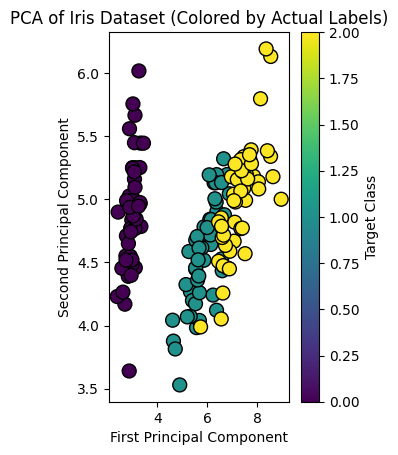

In [ ]:
# Plot PCA results
plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Iris Dataset (Colored by Actual Labels)')
plt.colorbar(label='Target Class')
plt.show()

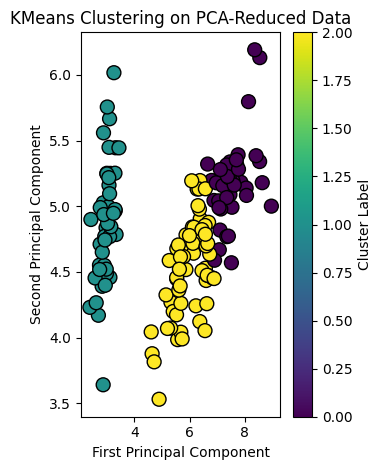

In [ ]:
# Plot KMeans clustering results
plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster Label')
plt.tight_layout()
plt.show()

In [ ]:

# Optionally, print the cluster centers from KMeans
print("Cluster Centers (in PCA space):")
print(kmeans.cluster_centers_)

Cluster Centers (in PCA space):
[[7.57700415 5.17860508]
 [2.97643199 4.86706597]
 [5.98794535 4.52559336]]
